* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [1]:
import pandas as pd

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [3]:
df1 = pd.read_csv('판다스data/공공자전거 대여이력 정보/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('판다스data/공공자전거 대여이력 정보/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('판다스data/공공자전거 대여이력 정보/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('판다스data/공공자전거 대여이력 정보/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('판다스data/공공자전거 대여이력 정보/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('판다스data/공공자전거 대여이력 정보/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [4]:
df6.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445939,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,00126,서강대 후문 옆,0,364.0,10153.36
3445940,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,00437,대흥역 1번출구,0,367.0,10100.71
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,00437,대흥역 1번출구,0,368.0,430.00
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


### 데이터 연결/확인
* concat

In [27]:
# concat
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

In [6]:
# head
df.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.0


In [7]:
#tail
df.tail(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [8]:
# 데이터 크기
df.shape

(13613873, 11)

In [9]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [28]:
# 자전거번호, 대여거치대, 반납거치대 제거
df.drop(['자전거번호', '대여거치대', '반납거치대'], axis=1, inplace=True)

In [11]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05


### 자료형 확인/변경

In [12]:
# 자료형 확인
df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [29]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')

In [30]:
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [16]:
# 메모리 용량 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [31]:
# datetime형으로 변경 : 대여일시,반납일시
df['대여일시'] = pd.to_datetime(df['대여일시'])

In [32]:
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [19]:
# 자료형 변경 확인
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

## 결측치 확인/처리

In [20]:
# 결측치 확인
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        123
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [33]:
# 결측치 제거
df = df.dropna(subset=['이용거리'], how='any', axis=0)

In [22]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [34]:
df['대여날짜'] = df['대여일시'].dt.date

In [25]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [35]:
# 대여날짜 별 대여건수 추출
df_date = df.groupby('대여날짜')['대여일시'].count().to_frame()
df_date.columns = ['대여건수']
df_date

,대여건수
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


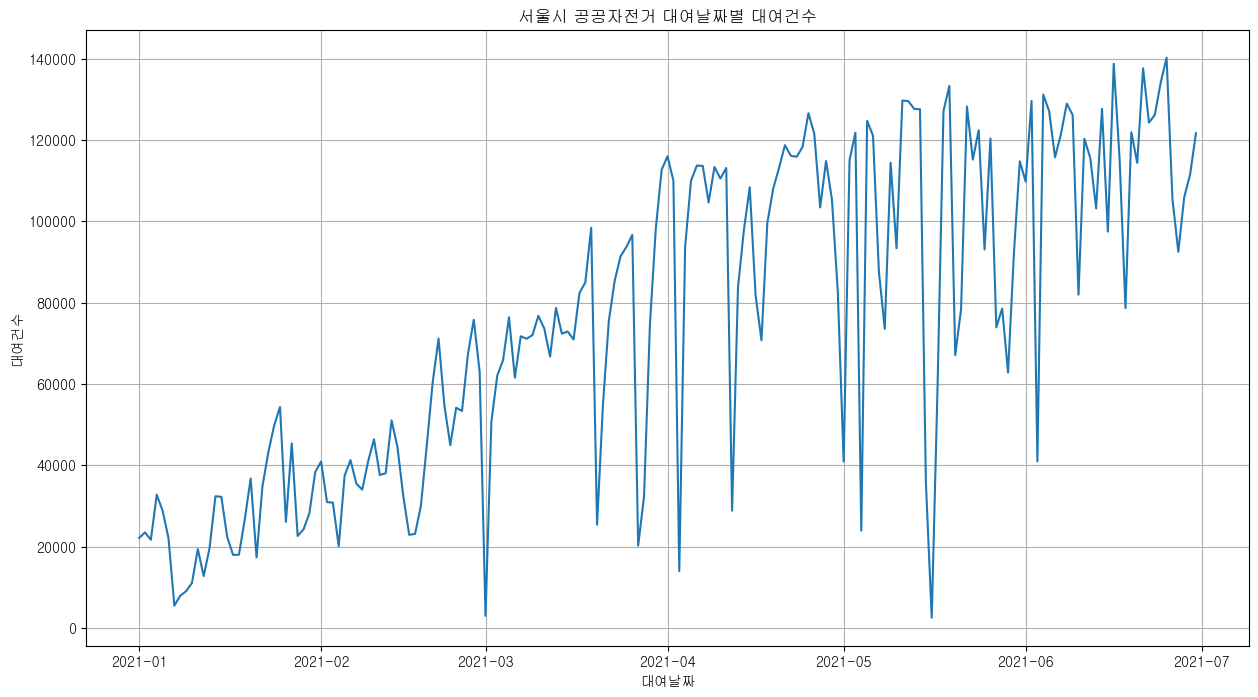

In [48]:
# 대여날짜 별 대여건수 시각화
x = df_date.index
y = df_date.values
plt.figure(figsize=(15,8))
plt.title('서울시 공공자전거 대여날짜별 대여건수')
plt.grid()
plt.xlabel('대여날짜')
plt.ylabel('대여건수')
plt.plot(x, y)
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [46]:
# 대여날짜 별 이용시간 추출
df_date_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()
df_date_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


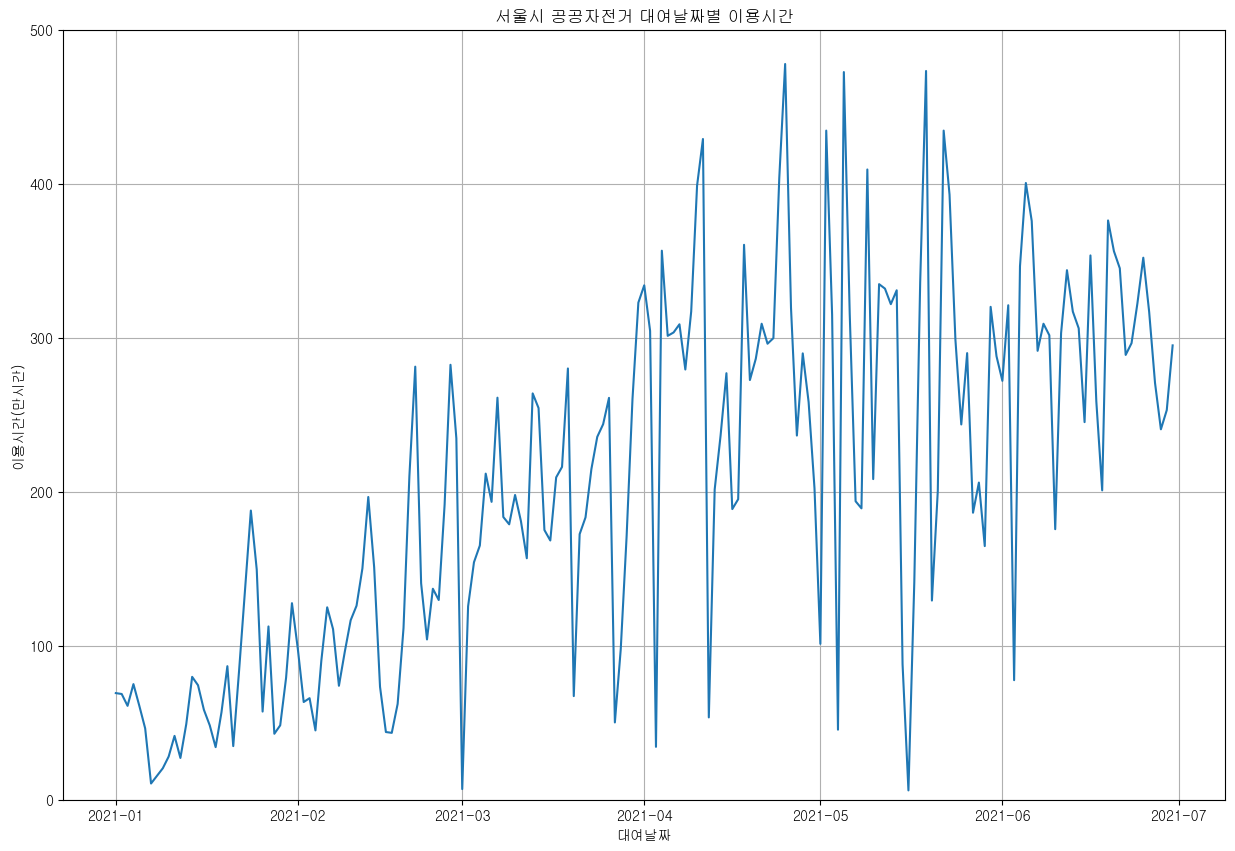

In [83]:
# 대여날짜 별 이용시간 시각화
x = df_date_time.index
y = df_date_time.values/10000
plt.figure(figsize=(15,10))
plt.title('서울시 공공자전거 대여날짜별 이용시간')
plt.grid()
plt.xlabel('대여날짜')
plt.ylabel('이용시간(만시간)')

plt.ylim([0, 500])
plt.plot(x, y)
plt.show()

## 대여날짜 별 이용 거리

In [41]:
# 대여날짜 별 이용거리 추출
df_date_m = df.groupby('대여날짜')['이용거리'].sum().to_frame()
df_date_m.describe()

,이용거리
count,1.810000e+02
mean,2.377961e+08
std,1.365508e+08
min,6.297332e+06
25%,1.099727e+08
50%,2.345092e+08
75%,3.568611e+08
max,5.353472e+08


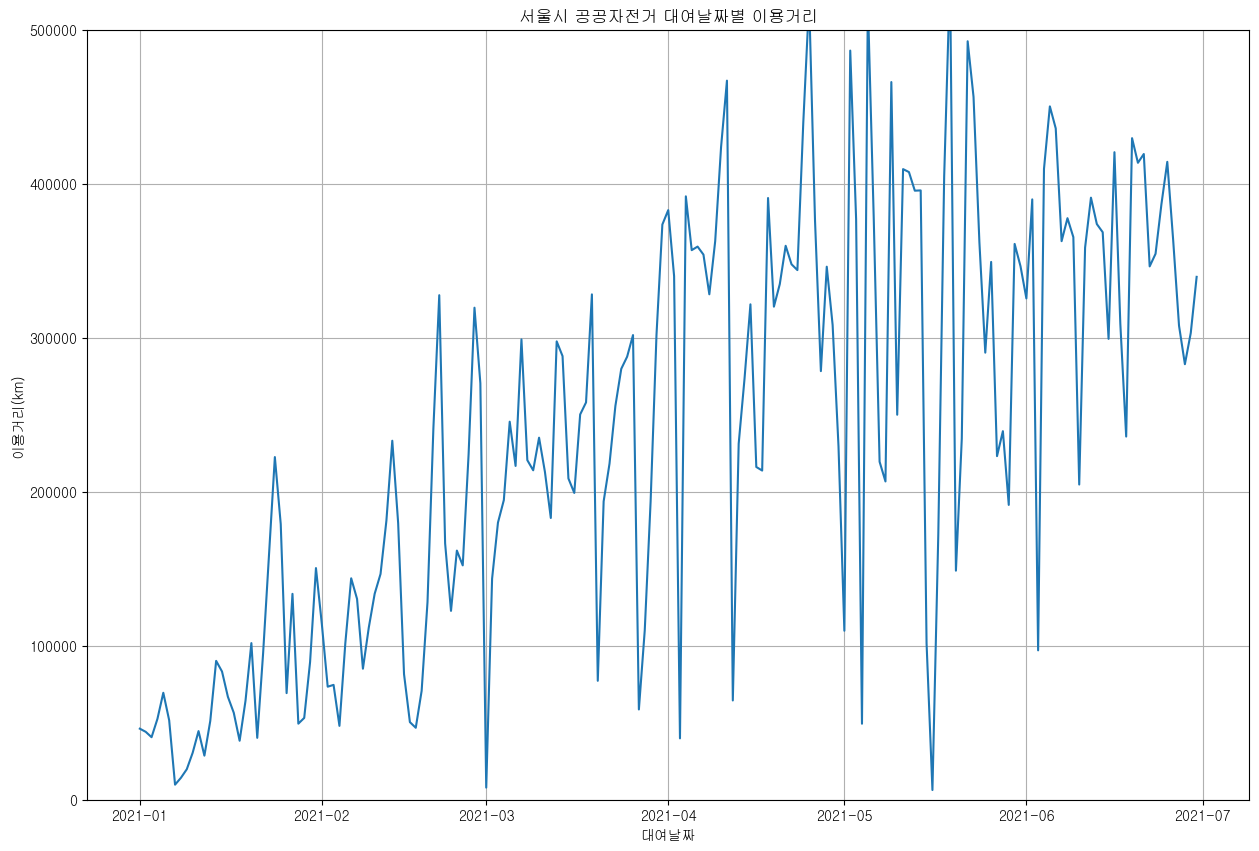

In [82]:
# 대여날짜 별 이용거리 시각화
x = df_date_m.index
y = df_date_m.values /1000
plt.figure(figsize=(15,10))
plt.title('서울시 공공자전거 대여날짜별 이용거리')
plt.grid()
plt.xlabel('대여날짜')
plt.ylabel('이용거리(km)')

plt.ylim([0, 500000])
plt.plot(x, y)
plt.show()

## 데이터프레임 합치기

In [53]:
df_Date = pd.concat([df_date, df_date_time, df_date_m], axis = 1)
df_Date

,대여건수,이용시간,이용거리
대여날짜,,,
2021-01-01,22119,692309.0,4.613529e+07
2021-01-02,23463,686580.0,4.409618e+07
2021-01-03,21656,609571.0,4.059830e+07
2021-01-04,32732,750721.0,5.249645e+07
2021-01-05,28819,610227.0,6.944856e+07
...,...,...,...
2021-06-26,105414,3168288.0,3.635015e+08
2021-06-27,92486,2706168.0,3.078146e+08
2021-06-28,105882,2405249.0,2.828124e+08


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [61]:
df['대여시간'] = df['대여일시'].dt.hour

In [62]:
df['반납시간'] = df['반납일시'].dt.hour

In [65]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
요일                  object
대여시간                 int64
반납시간                 int64
dtype: object

## 시간대별 대여/반납 현황

In [77]:
# 시간대별 대여현황
df_lent = df['대여시간'].value_counts()
df_lent = df_lent.sort_index()
df_lent

0      240025
1      158905
2      103629
3       68710
4       55391
5       84713
6      188920
7      486775
8      808506
9      499995
10     438084
11     537810
12     623065
13     667237
14     725175
15     816040
16     934211
17    1178279
18    1432779
19     984476
20     825031
21     770378
22     643611
23     341859
Name: 대여시간, dtype: int64

In [78]:
# 시간대별 반납현황
df_re = df['반납시간'].value_counts()
df_re = df_re.sort_index()
df_re

0      290169
1      190954
2      125912
3       80243
4       60368
5       73983
6      152003
7      389007
8      817076
9      499033
10     402350
11     470053
12     591577
13     628908
14     657826
15     749940
16     880629
17    1097623
18    1437723
19    1125447
20     864644
21     812357
22     768302
23     447477
Name: 반납시간, dtype: int64

## 시각화

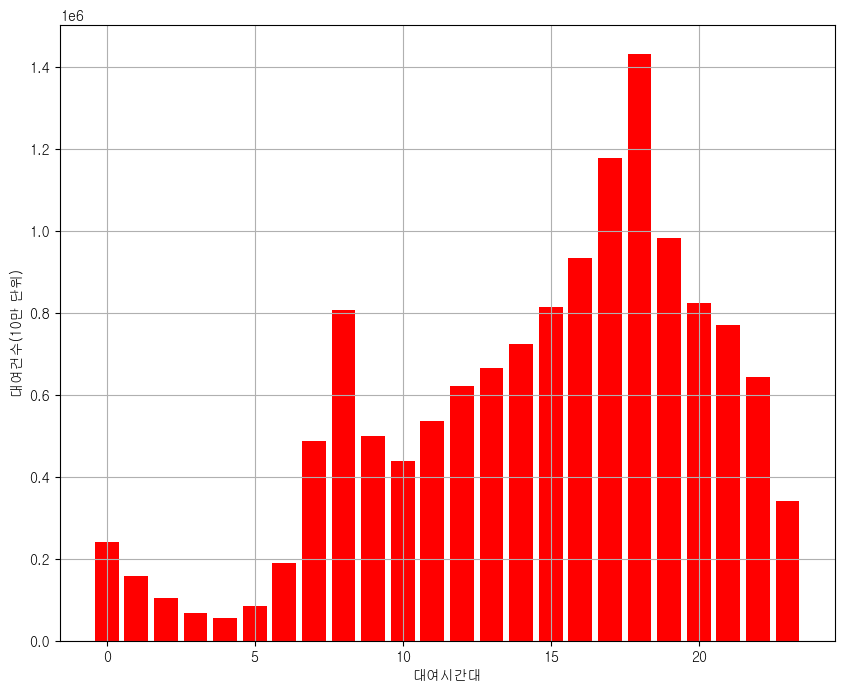

In [84]:
# 시간대별 공공자전거 대여건수 시각화
x = df_lent.index
y = df_lent.values
plt.figure(figsize=(10,8))
plt.bar(x, y, color='red')
plt.grid()
plt.xlabel('대여시간대')
plt.ylabel('대여건수(10만 단위)')
plt.show()

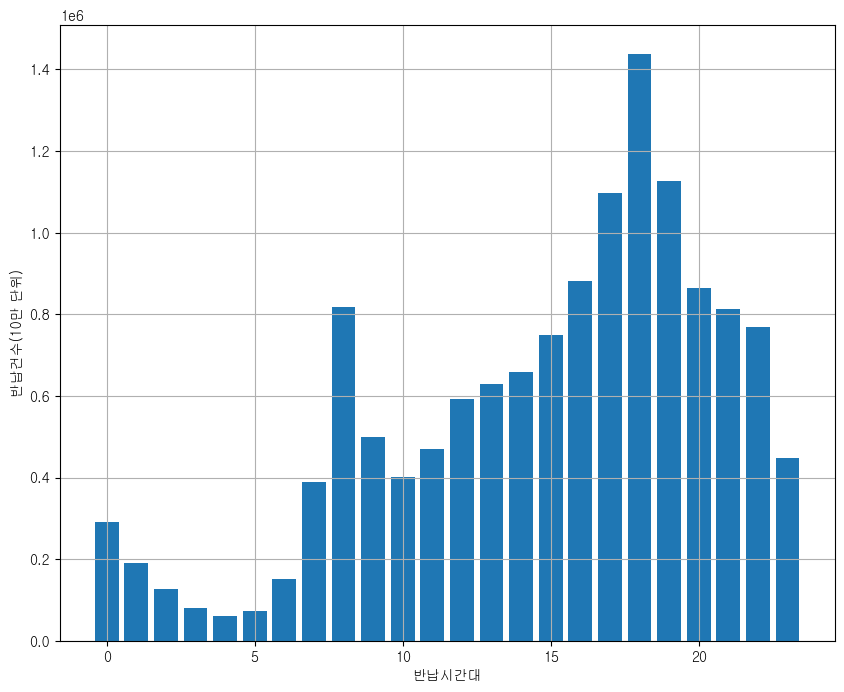

In [85]:
# 시간대별 공공자전거 반납건수 시각화
x = df_re.index
y = df_re.values
plt.figure(figsize=(10,8))
plt.bar(x, y)
plt.grid()
plt.xlabel('반납시간대')
plt.ylabel('반납건수(10만 단위)')
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [54]:
# 대여 대여소번호 갯수
df['대여 대여소번호'].nunique()

2493

In [90]:
# 반납대여소번호 갯수
df['반납대여소번호'].unique()

array([ 668,  540,  594, ..., 3640, 4588, 3811])

In [56]:
# 반납대여소 번호 처리 (str형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype(str)
df['반납대여소번호'].info()

<class 'pandas.core.series.Series'>
Int64Index: 13613604 entries, 0 to 3445943
Series name: 반납대여소번호
Non-Null Count     Dtype 
--------------     ----- 
13613604 non-null  object
dtypes: object(1)
memory usage: 207.7+ MB


In [57]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')

In [87]:
# 반납대여소 번호 처리 (int형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype(int)
df['반납대여소번호'].info

<bound method Series.info of 0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: int32>

In [59]:
# 반납대여소 번호 처리 (category형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [86]:
df['반납대여소번호'].info

<bound method Series.info of 0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]>

## 대여건수가 가장 많은 대여소 best10

In [92]:
# value_counts
df[['대여 대여소번호', '대여 대여소명']].value_counts()[:10].to_frame()

,,0
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


## 반납건수가 가장 많은 대여소 best10

In [93]:
# value_counts
df[['반납대여소번호', '반납대여소명']].value_counts()[:10].to_frame()

,,0
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [68]:
df_YN = df[df['대여 대여소명'] == '여의나루역 1번출구 앞']
df_YN.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,요일,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,Fri,1,1
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,Fri,4,4
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,Fri,9,9
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,Fri,10,11
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,Fri,11,11


### 반납 현황

In [97]:
# value_counts
df_YN[['반납대여소번호', '반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
2414,도곡역 아카데미스위트 앞,1
669,청계한신휴플러스앞 삼거리,1
1661,당현천근린공원,1


### 요일별 대여현황

In [99]:
#요일컬럼 추가 : strftime('%a')
df_YN['요일'] = df_YN['대여일시'].dt.strftime('%a')
df.head(2)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_5184\4228442969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_YN['요일'] = df_YN['대여일시'].dt.strftime('%a')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,요일,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.0,2021-01-02,Sat,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.0,2021-01-04,Mon,16,16


In [101]:
# value_counts
df_YN['요일'].value_counts()

Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8036
Tue     7235
Name: 요일, dtype: int64

### 이용시간 통계

In [102]:
# 이용시간 평균
df_YN['이용시간'].mean()

50.285879931588255

In [103]:
# 이용시간 최대
df_YN['이용시간'].max()

1268.0

In [104]:
# 이용시간 최소
df_YN['이용시간'].min()

1.0

In [105]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

27.27823322905529